# Statistical Testing

# 1. One-sample t test

## 1.1. Data import

In [1]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
import pandas as pd
df = pd.read_excel('Product weight.xlsx')  
df.head()

,weight
0,9.0
1,9.1
2,8.8
3,9.1
4,9.0


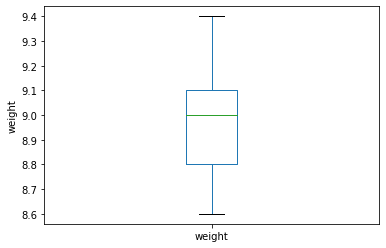

In [2]:
ax = df['weight'].plot.box()
ax.set_ylabel('weight');

## 1.2. Testing

H0: $\mu = 8.8$ <br>
H1: $\mu \ne 8.8$ <br>
$ T = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$

In [4]:
# reference: https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as st

T, p=st.ttest_1samp(df['weight'], 8.8, alternative='two-sided')
print('T = ', T)
print('p = ', p)

T =  2.5021729686848895
p =  0.0368171701202449


# 2. Two-sample t test

## 2.1. Data import

In [5]:
df = pd.read_excel('Method comparison.xlsx')  
df.head()

,Method 1,Method 2
0,15,23
1,20,31
2,11,13
3,20,19
4,16,23


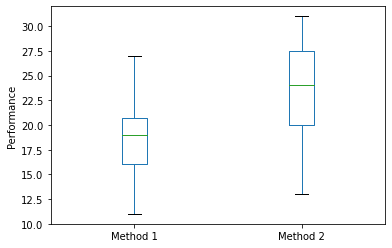

In [6]:
ax = df[['Method 1','Method 2']].plot.box()
ax.set_ylabel('Performance');

## 2.2 Equal variance test

H0: equal variance <br>
H1: Unequal variance

In [7]:
W, p = st.levene(df['Method 1'],df['Method 2'])
print('W = ', W)
print('p = ', p)

W =  0.2713846153846152
p =  0.6087542734258722


## 2.3. Testing (equal variance)

H0: $\mu_1 = \mu_2$ <br>
H1: $\mu_1 \ne \mu_2$ <br>
$ T = \frac{(\bar{x_1}-\bar{x_2}) - (\mu_1-\mu_2)}{s^2(\frac{1}{n_1}+\frac{1}{n_2})}$

In [8]:
T,p=st.ttest_ind(df['Method 1'],df['Method 2'],equal_var='True',alternative='two-sided')
print('T = ', T)
print('p = ', p)

T =  -1.9656257388581932
p =  0.0649626699019287


# 3. Paired t test

## 3.1. Data import

In [11]:
df = pd.read_excel('Hand strength comparison.xlsx')  
df.head()

,Left hand,Right hand
0,140,138
1,90,87
2,125,110
3,130,132
4,95,96


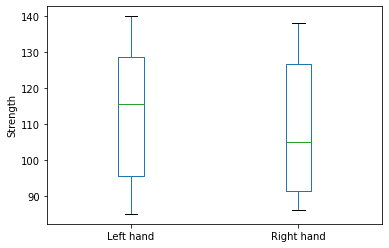

In [10]:
ax = df[['Left hand','Right hand']].plot.box()
ax.set_ylabel('Strength');

# 3.2. Testing

H0: $ d = 0$ <br>
H1: $d \ne 0$ <br>
$ T = \frac{\bar{d}-\mu_d}{\sqrt{\frac{s^2_d}{n}}}$

In [12]:
T,p=st.ttest_rel(df['Left hand'],df['Right hand'], alternative='two-sided')
print('T = ', T)
print('p = ', p)

T =  2.084646878501894
p =  0.06676035762365663
